In [344]:
import networkx as nx
import numpy as np
import random
import math

### Preparing Data

In [71]:
# Define the edge index and create the graph
edge_index = [ 
            [ 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 16 ], 
            [ 1, 5, 0, 2, 1, 3, 2, 4, 9, 3, 5, 6, 0, 4, 4, 7, 6, 8, 7, 9, 13, 3, 8, 10, 9, 11, 10, 12, 11, 13, 14, 8, 12, 12, 15, 16, 14, 14 ] 
]

G = nx.Graph()
for start, end in zip(*edge_index):
    G.add_edge(start, end)

# Define the node features (not used in RWR but given for context)
node_features = [ 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 1, 0, 0, 0, 0, 0, 0 ], 
                 [ 0, 1, 0, 0, 0, 0, 0 ], 
                 [ 0, 0, 1, 0, 0, 0, 0 ], 
                 [ 0, 0, 1, 0, 0, 0, 0 ] 
                 ]

edge_attr = [ [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 1, 0, 0 ], [ 0, 0, 1, 0 ], [ 0, 1, 0, 0 ] ]

# Applying RWR for all pairs of nodes
num_nodes = len(G.nodes())
rwr_matrix = np.zeros((num_nodes, num_nodes))

# for s in range(num_nodes):
#     for e in range(num_nodes):
#         rwr_matrix[s, e] = random_walk_with_restart_max_steps(G, s, e)

# rwr_matrix


In [72]:
n = G.nodes
print(n)

[0, 1, 5, 2, 3, 4, 9, 6, 7, 8, 13, 10, 11, 12, 14, 15, 16]


In [73]:
G.edges

EdgeView([(0, 1), (0, 5), (1, 2), (5, 4), (2, 3), (3, 4), (3, 9), (4, 6), (9, 8), (9, 10), (6, 7), (7, 8), (8, 13), (13, 12), (10, 11), (11, 12), (12, 14), (14, 15), (14, 16)])

In [123]:
# Feature to dic node
feat_dic = {}
for index, feat in enumerate(node_features):
    feat_dic[index] = np.array(feat)
print(feat_dic)

{0: array([1, 0, 0, 0, 0, 0, 0]), 1: array([1, 0, 0, 0, 0, 0, 0]), 2: array([1, 0, 0, 0, 0, 0, 0]), 3: array([1, 0, 0, 0, 0, 0, 0]), 4: array([1, 0, 0, 0, 0, 0, 0]), 5: array([1, 0, 0, 0, 0, 0, 0]), 6: array([1, 0, 0, 0, 0, 0, 0]), 7: array([1, 0, 0, 0, 0, 0, 0]), 8: array([1, 0, 0, 0, 0, 0, 0]), 9: array([1, 0, 0, 0, 0, 0, 0]), 10: array([1, 0, 0, 0, 0, 0, 0]), 11: array([1, 0, 0, 0, 0, 0, 0]), 12: array([1, 0, 0, 0, 0, 0, 0]), 13: array([1, 0, 0, 0, 0, 0, 0]), 14: array([0, 1, 0, 0, 0, 0, 0]), 15: array([0, 0, 1, 0, 0, 0, 0]), 16: array([0, 0, 1, 0, 0, 0, 0])}


In [124]:
# Edge features
nx.set_edge_attributes(G, edge_attr, "edge_attr")

In [125]:
feat_dic.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [126]:
nx.set_node_attributes(G, values=feat_dic, name="node_features")

In [127]:
for node in G.nodes:
    print(G.nodes[node])
    print(node)

{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
0
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
1
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
5
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
2
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
3
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
4
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
9
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
6
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
7
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
8
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
13
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
10
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
11
{'node_features': array([1, 0, 0, 0, 0, 0, 0])}
12
{'node_features': array([0, 1, 0, 0, 0, 0, 0])}
14
{'node_features': array([0, 0, 1, 0, 0, 0, 0])}
15
{'node_features': array([0, 0, 1, 0, 0, 0, 0])}
16


### HitPath

#### Probability

In [140]:
# W vi to vj
# return matrix N x N
W = np.zeros((len(G.nodes), len(G.nodes)))
for i in G.nodes:
    for j in G.nodes:
        W[i][j] = round(np.linalg.norm(G.nodes[i]['node_features'] - G.nodes[j]['node_features']), 1)
W

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 1.4, 1.4, 1.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0

In [161]:
P = np.zeros((len(G.nodes), len(G.nodes)))
for i in G.nodes:
    # for neighbor in G.neighbors(i):
    neighbors = list(G.neighbors(i))
    denum = 0
    print(i, neighbors)
    for neighbor in neighbors:
        denum += W[i][neighbor]
    for neighbor in neighbors:
        # if W[i][neighbor] == 0:
        if denum == 0:
            P[i][neighbor] = round(1/len(neighbors), 2)
            continue
        P[i][neighbor] = round(W[i][neighbor]/denum, 2)
    #     print(W[i][neighbor])
    # print("=", denum)
    # break
P

0 [1, 5]
1 [0, 2]
5 [0, 4]
2 [1, 3]
3 [2, 4, 9]
4 [3, 5, 6]
9 [3, 8, 10]
6 [4, 7]
7 [6, 8]
8 [7, 9, 13]
13 [8, 12]
10 [9, 11]
11 [10, 12]
12 [11, 13, 14]
14 [12, 15, 16]
15 [14]
16 [14]


array([[0.  , 0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.33, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.33, 0.  , 0.33, 0.33, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.5 , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  

Probability refactoring

In [332]:
def calculate_transition_probability(G):
    # W vi to vj
    # return matrix N x N
    W = np.zeros((len(G.nodes), len(G.nodes)))
    for i in G.nodes:
        for j in G.nodes:
            W[i][j] = round(np.linalg.norm(G.nodes[i]['node_features'] - G.nodes[j]['node_features']), 1)
    # W

    P = np.zeros((len(G.nodes), len(G.nodes)))
    for i in G.nodes:
        # for neighbor in G.neighbors(i):
        neighbors = list(G.neighbors(i))
        denum = 0
        # print(i, neighbors)
        for neighbor in neighbors:
            denum += W[i][neighbor]
        for neighbor in neighbors:
            # if W[i][neighbor] == 0:
            if denum == 0:
                P[i][neighbor] = round(1/len(neighbors), 2)
                continue
            P[i][neighbor] = round(W[i][neighbor]/denum, 2)
        #     print(W[i][neighbor])
        # print("=", denum)
        # break
    return P

In [333]:

def hitpath(G, s, e, max_steps = G.number_of_nodes()//2, max_iter = 10):
    transition_probability = calculate_transition_probability(G)
    # print(transition_probability)
    sigma = 4 * G.number_of_nodes()  
    
    hitting_distance = []
    
    for _ in range(max_iter):
        # print(f'iter {_}')
        
        # save route
        route = [s] 
        step_counter = 0
        
        # print(s)
        hitpath = 0
        
        # do random walk bounded by max steps
        while (step_counter < max_steps):
            prob_neighbors = []
            if route[-1] in G:
                # see neighbors
                neighbors = list(G.neighbors(route[-1]))
                if neighbors:
                    if len(neighbors) > 1:
                        # choose step based on transition probability
                        # print('calculate prob', neighbors)
                        for neighbor in neighbors:
                            prob_neighbors.append(transition_probability[route[-1]][neighbor])
                        choosen_node = neighbors[random.choices(range(len(prob_neighbors)), weights=prob_neighbors, k=1)[0]]
                        route.append(choosen_node)
                    elif len(neighbors) == 1:
                        # can walk directly
                        # print('walk')
                        route.append(neighbors[0])
                        # print('walk, ', route)
                
                # print('Step: ', step_counter,'stat', neighbors, prob_neighbors, choosen_node)
            step_counter+=1
            if (e in route):
                break
        if step_counter == max_steps:
            hitting_distance.append(sigma)
        else:
            hitdist = 0
            for i in range(len(route)-1):
                hitdist += 1
            hitting_distance.append(hitdist)
        # after walk, calculate hitting distance
        
        hitpath = sum(hitting_distance)/(max_steps)
        
        # print(_, " --> Route: ", route, "max exceeded" if step_counter == max_steps else "reached, H=", hitting_distance,hitpath)
    hitpath = sum(hitting_distance)/(max_steps)
    
    return hitpath
hitpath(G, 0, 3, max_iter=10)

53.25

In [404]:
H = np.zeros((len(G.nodes), len(G.nodes)))
for i in G.nodes:
    for j in G.nodes:
        H[i][j] = hitpath(G, i, j, max_iter=100)

In [405]:
H

array([[ 12.5  , 244.875, 355.   , 445.875, 414.75 , 223.5  , 637.125,
        803.   , 826.875, 786.75 , 796.125, 826.75 , 834.75 , 842.25 ,
        850.   , 850.   , 850.   ],
       [254.   ,  12.5  , 257.   , 431.   , 471.25 , 473.   , 724.25 ,
        725.75 , 771.25 , 637.125, 779.25 , 842.125, 834.5  , 826.875,
        834.75 , 850.   , 850.   ],
       [447.25 , 301.75 ,  12.5  , 207.5  , 537.25 , 492.375, 716.375,
        756.25 , 730.875, 584.75 , 786.75 , 834.5  , 811.375, 795.   ,
        788.   , 850.   , 842.375],
       [689.5  , 582.5  , 439.   ,  12.5  , 422.   , 576.25 , 681.5  ,
        684.625, 656.5  , 438.   , 664.   , 762.625, 763.25 , 747.875,
        795.625, 834.5  , 842.25 ],
       [640.   , 586.375, 634.75 , 349.125,  12.5  , 343.   , 464.125,
        649.25 , 652.875, 584.5  , 755.5  , 786.5  , 818.75 , 810.5  ,
        834.5  , 850.   , 834.75 ],
       [287.   , 480.5  , 517.5  , 490.5  , 227.75 ,  12.5  , 575.25 ,
        739.25 , 740.25 , 676.5  , 818.

In [406]:
def similarity(G, H, s, e, gamma = 0.8, ):
    # print('wow')
    similarity = 0
    shortest_path_length = nx.shortest_path_length(G, s, e)
    
    # print(similarity)
    similarity = (gamma * math.exp(-shortest_path_length)) + ((1-gamma) * (H[s][e] - H[e][s])*2)
    return similarity
similarity(G, H, 0, 3)

-97.41017034530569

In [407]:
S = np.zeros((len(G.nodes), len(G.nodes)))
for i in G.nodes:
    for j in G.nodes:
        S[i][j] = similarity(G, H, i, j)
S

array([[ 8.00000000e-01, -3.35569645e+00, -3.67917318e+01,
        -9.74101703e+01, -8.99917318e+01, -2.51056964e+01,
        -9.01017035e+00,  9.41465251e+00,  1.24053904e+01,
         9.71465251e+00,  2.05390358e-01,  1.98300174e-03,
        -6.09927049e+00,  1.98300174e-03,  2.68370102e-04,
         9.87278433e-05,  9.87278433e-05],
       [ 3.94430355e+00,  8.00000000e-01, -1.76056964e+01,
        -6.04917318e+01, -4.60101703e+01, -2.89173177e+00,
        -1.85853475e+01,  5.90539036e+00, -1.57853475e+01,
        -3.42101703e+01, -1.25853475e+01,  3.05539036e+00,
        -6.19801700e+00, -3.04460964e+00, -6.09927049e+00,
         2.68370102e-04,  2.68370102e-04],
       [ 3.70082682e+01,  1.81943036e+01,  8.00000000e-01,
        -9.23056964e+01, -3.88917318e+01, -1.00101703e+01,
         3.68982965e+00,  1.30146525e+01, -1.25601703e+01,
        -2.16917318e+01,  6.33982965e+00,  3.31465251e+00,
        -1.54446096e+01, -3.18534749e+00, -2.47980170e+01,
         7.29505572e-04, -3.0

#### AP Clustering

In [408]:
from sklearn.cluster import AffinityPropagation

In [409]:
clustering = AffinityPropagation(affinity='precomputed').fit(S)

In [410]:
labels = {} 
for i, l in enumerate(clustering.labels_):
    labels[i] = l


In [411]:
import matplotlib.pyplot as plt

{0: Text(-0.8587195459143456, 0.202687363774823, '0'),
 1: Text(-0.8264893393454278, 0.032770203537546005, '2'),
 2: Text(-0.631071108236931, -0.04578219261508642, '0'),
 3: Text(-0.38266982904224245, -0.02722444421389963, '0'),
 4: Text(-0.46340877283617626, 0.1847380263703828, '0'),
 5: Text(-0.6805579625923737, 0.2588435815846246, '0'),
 6: Text(-0.2645871173171283, 0.25449082252728655, '1'),
 7: Text(-0.06268637935908866, 0.1880872565833823, '2'),
 8: Text(0.09050680069216302, 0.02122356439849912, '2'),
 9: Text(-0.09298293002156847, -0.1116199634879341, '2'),
 10: Text(0.12286032758272718, -0.24949544248607386, '2'),
 11: Text(0.36050451717365944, -0.25965554821005915, '3'),
 12: Text(0.5552054517141912, -0.1400613622136348, '3'),
 13: Text(0.34235706970131086, -0.0334696799009711, '1'),
 14: Text(0.8243805020571168, -0.11058069282046684, '3'),
 15: Text(0.9999999999999999, -0.17513403280211615, '3'),
 16: Text(0.967358315744114, 0.010182539973697764, '3')}

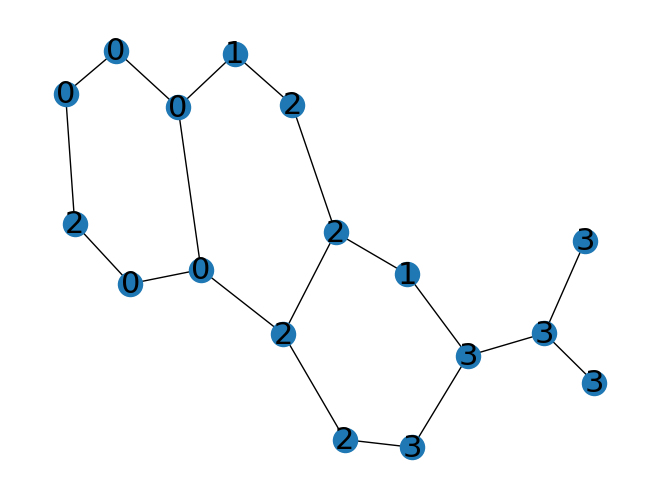

In [412]:
pos = nx.spring_layout(G, seed=212)

nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="black")